# Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = "blue">
    
Content:

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numarical Variable Analysis](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7) 
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")# hataları gösterme demek
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id ="1"></a><br>
# 1.Load and Check Data

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassangerId = test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<a id = "2"> </a> <br>
# 2.Variable Description

1. PassengerId : unique id number to each passanger
1. Pclass : passanger class 
1. Name : name
1. Sex : gender of passengers
1. Age : age of passanger
1. SibSp : number of siblings / spouses
1. Parch : number of parants / children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton )

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* float64(2) : Fare and Age
* int64(4) : PassengerId, Pclass, SibSp, Parch
* object(5) : Name, Sex, Ticket, Cabin, Embarked

<a id = "3"> </a> <br>
# Univariate Variable Analysis
        
* Categorical Variable : Sex, Pclass, Embarked, Cabin, Name, SibSp and Parch
* Numarical Variable : Fare, Age and PassengerId

<a id = "4"> </a> <br>
## Categorical Variable

In [7]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    
    """
    # get feature
    var = train_df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

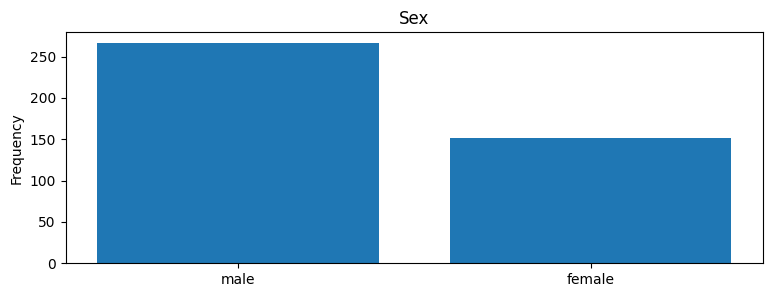

Sex: 
 Sex
male      266
female    152
Name: count, dtype: int64


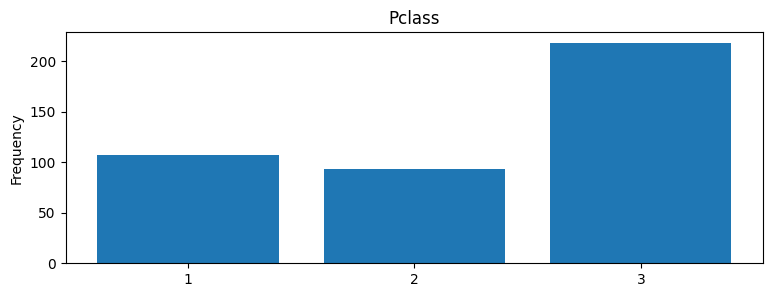

Pclass: 
 Pclass
3    218
1    107
2     93
Name: count, dtype: int64


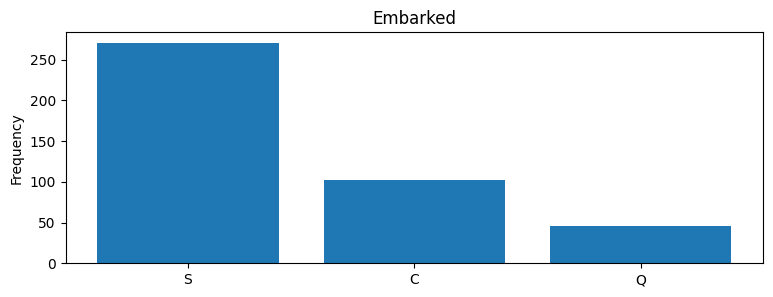

Embarked: 
 Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


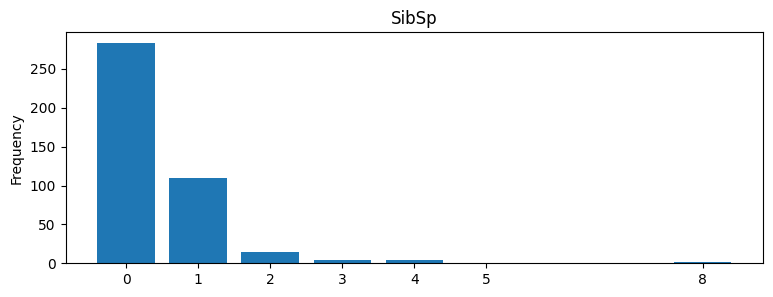

SibSp: 
 SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


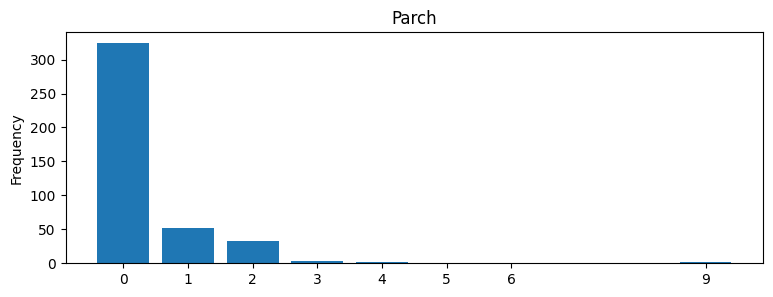

Parch: 
 Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64


In [8]:
category1 = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [9]:
category2 = ["Cabin","Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64 

Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64 

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64 



<a id = "5"> </a> <br>
## Numarical Variable :

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

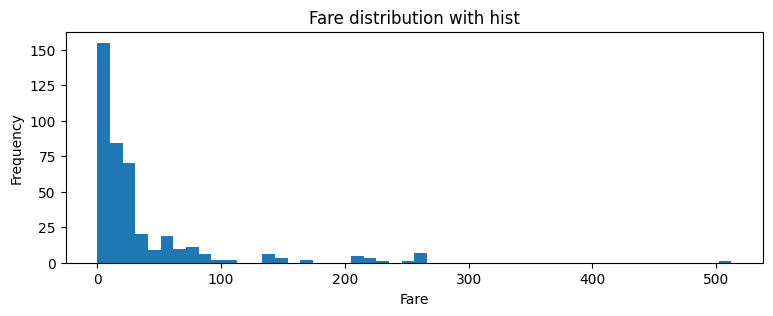

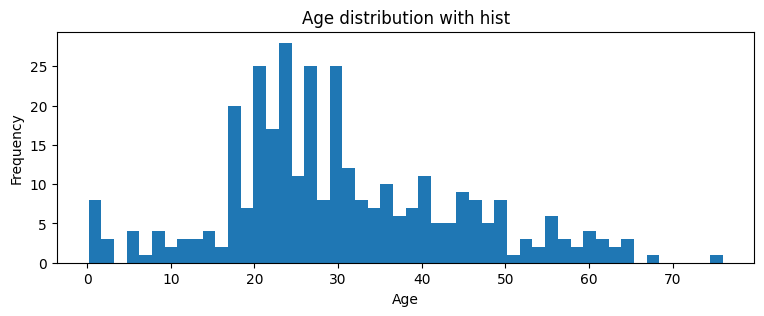

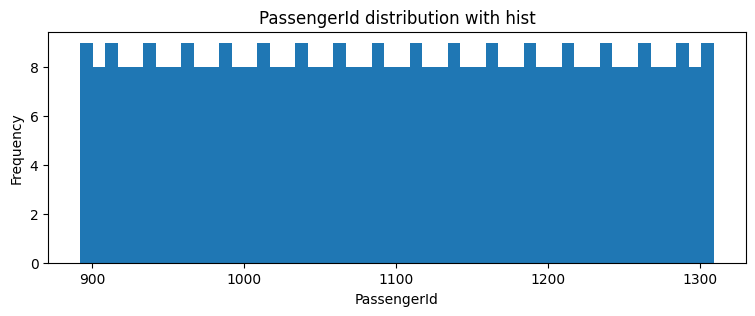

In [11]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id ="6"></a><br>
# 3.Basic Data Analaysis
* Pclass-Age
* Sex-Age
* SibSp- Age
* Parch-Age

In [12]:
# Pclass-Age

train_df[["Pclass", "Age"]]

,Pclass,Age
0,3,34.5
1,3,47.0
2,2,62.0
3,3,27.0
4,3,22.0
...,...,...
413,3,NaN
414,1,39.0
415,3,38.5
416,3,NaN


In [13]:
# Sex-Age

train_df[["Pclass","Age"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Age",ascending = False )

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


In [14]:
# Sex-Age

train_df[["Sex","Age"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Age", ascending = False)

,Sex,Age
1,male,30.272732
0,female,30.272362


In [15]:
#SibSp- Age

train_df[["SibSp","Age"]].groupby(["SibSp"],as_index= False).mean().sort_values(by = "Age",ascending= False)

,SibSp,Age
1,1,32.884948
0,0,29.874579
2,2,25.727273
3,3,23.500000
4,4,16.500000
6,8,14.500000
5,5,10.000000


In [16]:
# Parch-Age
train_df[["Parch","Age"]].groupby(["Parch"], as_index=False).mean().sort_values(by = "Age",ascending= False)

,Parch,Age
4,4,60.000000
3,3,48.333333
5,5,40.000000
6,6,40.000000
0,0,31.528340
1,1,26.161600
2,2,23.100690
7,9,NaN


<a id= "7"></a><br>
# Outlier Detection

In [17]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        #3 rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #outlier_step
        outlier_step = IQR * 1.5
        #detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [18]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch", "Fare"])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [19]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df ], axis = 0).reset_index(drop = True)

In [20]:
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id = "9"></a><br>

## Find Missing Value

In [21]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [22]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             2
Cabin          654
Embarked         0
dtype: int64

<a id = "10"></a><br>

## Fill Missing Value
* Fare has only 1

In [23]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
570,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [24]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]== 3]["Fare"]))

In [25]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
